# Import Liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

# Import Datasets

In [2]:
path= '/content/KPMG_VI_New_raw_data_update_final.xlsx'

In [3]:
df_transactions= pd.read_excel(path, sheet_name= 'Transactions', skiprows= 1)

In [4]:
df_NewCustomerList= pd.read_excel(path, sheet_name= 'NewCustomerList', skiprows= 1)

In [5]:
df_CustomerDemographic= pd.read_excel(path, sheet_name= 'CustomerDemographic', skiprows= 1)

In [6]:
df_CustomerAddress= pd.read_excel(path, sheet_name= 'CustomerAddress', skiprows= 1)

In [7]:
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [8]:
df_NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [9]:
df_CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [10]:
df_CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


# Data Cleaning

## Cleaning df_transactions

In [11]:
df_transactions.sample(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
11214,11215,76,3314,2017-05-20,0.0,Approved,WeareA2B,Standard,low,medium,642.31,513.85,41533.0
13321,13322,66,1968,2017-01-02,1.0,Approved,Giant Bicycles,Road,low,small,590.26,525.33,40487.0
18759,18760,28,1740,2017-06-17,0.0,Approved,Norco Bicycles,Standard,medium,small,1216.14,1082.36,42696.0
10511,10512,47,727,2017-02-26,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,38991.0
5360,5361,45,3205,2017-01-07,1.0,Approved,Solex,Standard,medium,medium,441.49,84.99,34071.0


In [12]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [13]:
# convert [0, 1] in online_order column to bool values 0 = Fasle & 1 = True
print(f"sum of null values after convert= {(df_transactions['online_order'].astype(bool)).isna().sum()}")

# convert to bool
df_transactions['online_order']= df_transactions['online_order'].astype(bool)

# check it is converted
print(f"data type: {df_transactions['online_order'].dtype}")

sum of null values after convert= 0
data type: bool


In [14]:
# rename column product_first_sold_date

df_transactions.rename(columns= {'product_first_sold_date': 'f_sold_date'}, inplace= True)

In [15]:
# sum of null values before convert
print(f"sum of null before= {df_transactions['f_sold_date'].isna().sum()}")

# calculate sum of null values after convert
print(f"sum of null after= {pd.to_datetime(df_transactions['f_sold_date'], format= 'mixed').isna().sum()}")

# convert to datetime
df_transactions['f_sold_date']= pd.to_datetime(df_transactions['f_sold_date'], format= 'mixed')

# check converted
print(f"data type: {df_transactions['f_sold_date'].dtype}")

sum of null before= 197
sum of null after= 197
data type: datetime64[ns]


In [16]:
# check data entegrity

for col in df_transactions.columns:
  if (df_transactions[col].dtypes == 'object') & (len(df_transactions[col].unique()) <= 15):
    print(f"column name: {col}\n")
    print(f"unique values: {df_transactions[col].unique()}\n")

column name: order_status

unique values: ['Approved' 'Cancelled']

column name: brand

unique values: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]

column name: product_line

unique values: ['Standard' 'Road' 'Mountain' 'Touring' nan]

column name: product_class

unique values: ['medium' 'low' 'high' nan]

column name: product_size

unique values: ['medium' 'large' 'small' nan]



In [17]:
# check outliers

print(df_transactions.select_dtypes(include= 'number').drop(columns= ['transaction_id', 'product_id', 'customer_id']).describe().round(2))

       list_price  standard_cost
count    20000.00       19803.00
mean      1107.83         556.05
std        582.83         405.96
min         12.01           7.21
25%        575.27         215.14
50%       1163.89         507.58
75%       1635.30         795.10
max       2091.47        1759.85


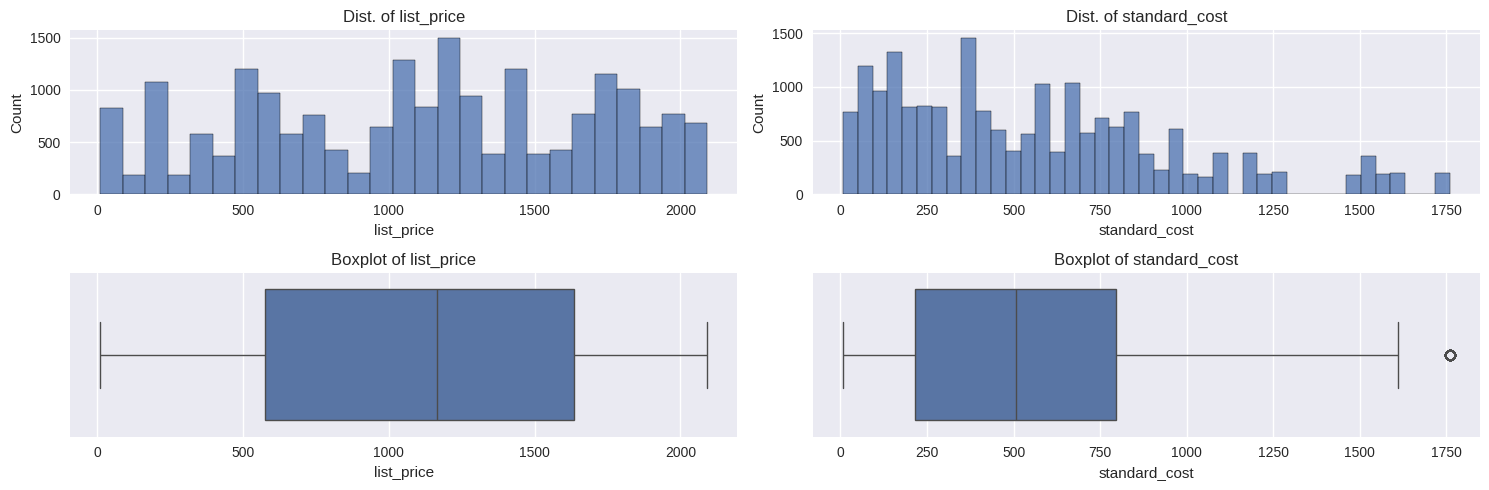

In [18]:
plt.figure(figsize= (15, 5))
col_array= ['list_price', 'standard_cost']
i= 1
for col in col_array:
    plt.subplot(2, 2, i)
    sns.histplot(data= df_transactions,
                 x= col,
                 bins= 'auto')
    plt.title(f'Dist. of {col}')

    plt.subplot(2, 2, i+2)
    sns.boxplot(data= df_transactions,
                x= col)
    plt.title(f'Boxplot of {col}')
    i+=1

plt.tight_layout()
plt.show()

**Outliers:**

- ***standard cost = 1750 is an outlier***

In [19]:
# shape of outlier records
print(f"shape: {df_transactions[df_transactions['standard_cost'] > 1750].shape}\n\n")

shape: (195, 13)




In [20]:
# drop
df_transactions= df_transactions[df_transactions['standard_cost'] < 1750]

df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19608 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19608 non-null  int64         
 1   product_id        19608 non-null  int64         
 2   customer_id       19608 non-null  int64         
 3   transaction_date  19608 non-null  datetime64[ns]
 4   online_order      19608 non-null  bool          
 5   order_status      19608 non-null  object        
 6   brand             19608 non-null  object        
 7   product_line      19608 non-null  object        
 8   product_class     19608 non-null  object        
 9   product_size      19608 non-null  object        
 10  list_price        19608 non-null  float64       
 11  standard_cost     19608 non-null  float64       
 12  f_sold_date       19608 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 2.0+

In [21]:
# reset index
df_transactions.reset_index(drop= True, inplace= True)

# check
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19608 entries, 0 to 19607
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19608 non-null  int64         
 1   product_id        19608 non-null  int64         
 2   customer_id       19608 non-null  int64         
 3   transaction_date  19608 non-null  datetime64[ns]
 4   online_order      19608 non-null  bool          
 5   order_status      19608 non-null  object        
 6   brand             19608 non-null  object        
 7   product_line      19608 non-null  object        
 8   product_class     19608 non-null  object        
 9   product_size      19608 non-null  object        
 10  list_price        19608 non-null  float64       
 11  standard_cost     19608 non-null  float64       
 12  f_sold_date       19608 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(2), int64(3), object(5)
memory usage:

In [22]:
# check of duplication

print(f"sum of duplicated values= {df_transactions.duplicated().sum()}")

sum of duplicated values= 0


## Cleaning df_NewCustomerList

In [23]:
df_NewCustomerList.head(2)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.70,0.8750,0.743750,1,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.89,1.1125,0.945625,1,1,1.71875


In [24]:
df_NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [25]:
# drop columns
df_NewCustomerList.drop(columns= ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], inplace= True)

# check
print(df_NewCustomerList.columns)

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')


In [26]:
# rename column
df_NewCustomerList.rename(columns= {'past_3_years_bike_related_purchases': 'past_3_yrs_purchases'}, inplace= True)

# check
print(df_NewCustomerList.columns)

Index(['first_name', 'last_name', 'gender', 'past_3_yrs_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'Rank', 'Value'],
      dtype='object')


In [27]:
# check data integrity
for col in df_NewCustomerList.columns:
    if (df_NewCustomerList[col].dtypes == 'object') & (len(df_NewCustomerList[col].unique()) <= 15):
        print(f"column name: {col}\n")
        print(f"unique values: {df_NewCustomerList[col].unique()}\n")

column name: gender

unique values: ['Male' 'Female' 'U']

column name: job_industry_category

unique values: ['Manufacturing' 'Property' 'Financial Services' 'Entertainment' 'Retail'
 'IT' 'Telecommunications' 'Health' nan 'Argiculture']

column name: wealth_segment

unique values: ['Mass Customer' 'Affluent Customer' 'High Net Worth']

column name: deceased_indicator

unique values: ['N']

column name: owns_car

unique values: ['Yes' 'No']

column name: state

unique values: ['QLD' 'NSW' 'VIC']

column name: country

unique values: ['Australia']



In [28]:
# drop gender values equal U
df_NewCustomerList.drop(index= df_NewCustomerList[df_NewCustomerList['gender'] == 'U'].index, inplace= True)

# check
print(df_NewCustomerList['gender'].unique())

['Male' 'Female']


In [29]:
# drop null values in job_industry_category
df_NewCustomerList.drop(index= df_NewCustomerList[df_NewCustomerList['job_industry_category'].isna()].index, inplace= True)

# check
print(f"sum of null values in job_industry_category= {df_NewCustomerList['job_industry_category'].isna().sum()}")

sum of null values in job_industry_category= 0


In [30]:
# check format after convert
print(f"sum of null after convert= {df_NewCustomerList['owns_car'].astype(bool).isna().sum()}")

# convert owns_car column into bool
df_NewCustomerList['owns_car']= df_NewCustomerList['owns_car'].astype(bool)

# check
print(f"data type of owns_car column: {df_NewCustomerList['owns_car'].dtype}")

sum of null after convert= 0
data type of owns_car column: bool


In [31]:
# check format after convert
print(f"sum of null after convert= {df_NewCustomerList['deceased_indicator'].astype(bool).isna().sum()}")

# convert deceased_indicator column into bool
df_NewCustomerList['deceased_indicator']= df_NewCustomerList['deceased_indicator'].astype(bool)

# check
print(f"data type of deceased_indicator column: {df_NewCustomerList['deceased_indicator'].dtype}")

sum of null after convert= 0
data type of deceased_indicator column: bool


In [32]:
# check data integrity again

for col in df_NewCustomerList.columns:
    if (df_NewCustomerList[col].dtypes == 'object') & (len(df_NewCustomerList[col].unique()) <= 15):
        print(f"column name: {col}\n")
        print(f"unique values: {df_NewCustomerList[col].unique()}\n")

column name: gender

unique values: ['Male' 'Female']

column name: job_industry_category

unique values: ['Manufacturing' 'Property' 'Financial Services' 'Entertainment' 'Retail'
 'IT' 'Telecommunications' 'Health' 'Argiculture']

column name: wealth_segment

unique values: ['Mass Customer' 'Affluent Customer' 'High Net Worth']

column name: state

unique values: ['QLD' 'NSW' 'VIC']

column name: country

unique values: ['Australia']



In [33]:
# check null values
df_NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
Index: 818 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   first_name             818 non-null    object 
 1   last_name              795 non-null    object 
 2   gender                 818 non-null    object 
 3   past_3_yrs_purchases   818 non-null    int64  
 4   DOB                    818 non-null    object 
 5   job_title              735 non-null    object 
 6   job_industry_category  818 non-null    object 
 7   wealth_segment         818 non-null    object 
 8   deceased_indicator     818 non-null    bool   
 9   owns_car               818 non-null    bool   
 10  tenure                 818 non-null    int64  
 11  address                818 non-null    object 
 12  postcode               818 non-null    int64  
 13  state                  818 non-null    object 
 14  country                818 non-null    object 
 15  property_va

In [34]:
# replace VIC with Victoria, NSW with New South Wales & QLD with Queensland
for x in df_NewCustomerList.index:
    if df_NewCustomerList.loc[x, 'state'] == 'VIC':
        df_NewCustomerList.loc[x, 'state'] = 'Victoria'
    elif df_NewCustomerList.loc[x, 'state'] == 'NSW':
        df_NewCustomerList.loc[x, 'state'] = 'New South Wales'
    elif df_NewCustomerList.loc[x, 'state'] == 'QLD':
        df_NewCustomerList.loc[x, 'state'] = 'Queensland'

# check
print(df_NewCustomerList['state'].unique())

['Queensland' 'New South Wales' 'Victoria']


In [35]:
# check duplicated values in first_name & last_name to find good fill values of job_title
print(f"sum of duplicated values in 'first_name', 'last_name'= {df_NewCustomerList[['first_name', 'last_name']].duplicated().sum()}")

sum of duplicated values in 'first_name', 'last_name'= 0


In [36]:
# drop null values
df_NewCustomerList.dropna(axis= 'index', inplace= True)

#check
print(f"sum of null values:\n{df_NewCustomerList.isna().sum()}")

sum of null values:
first_name               0
last_name                0
gender                   0
past_3_yrs_purchases     0
DOB                      0
job_title                0
job_industry_category    0
wealth_segment           0
deceased_indicator       0
owns_car                 0
tenure                   0
address                  0
postcode                 0
state                    0
country                  0
property_valuation       0
Rank                     0
Value                    0
dtype: int64


In [37]:
# check outliers
df_NewCustomerList.select_dtypes(include= 'number').drop(columns= 'postcode').describe()

,past_3_yrs_purchases,tenure,property_valuation,Rank,Value
count,715.000000,715.000000,715.000000,715.000000,715.000000
mean,49.806993,11.349650,7.386014,507.942657,0.873785
std,27.735227,5.011274,2.830274,290.855597,0.296971
min,0.000000,1.000000,1.000000,1.000000,0.340000
25%,27.000000,7.000000,6.000000,252.000000,0.637500
50%,51.000000,11.000000,8.000000,524.000000,0.836719
75%,71.500000,15.000000,9.000000,760.000000,1.073125
max,99.000000,22.000000,12.000000,1000.000000,1.718750


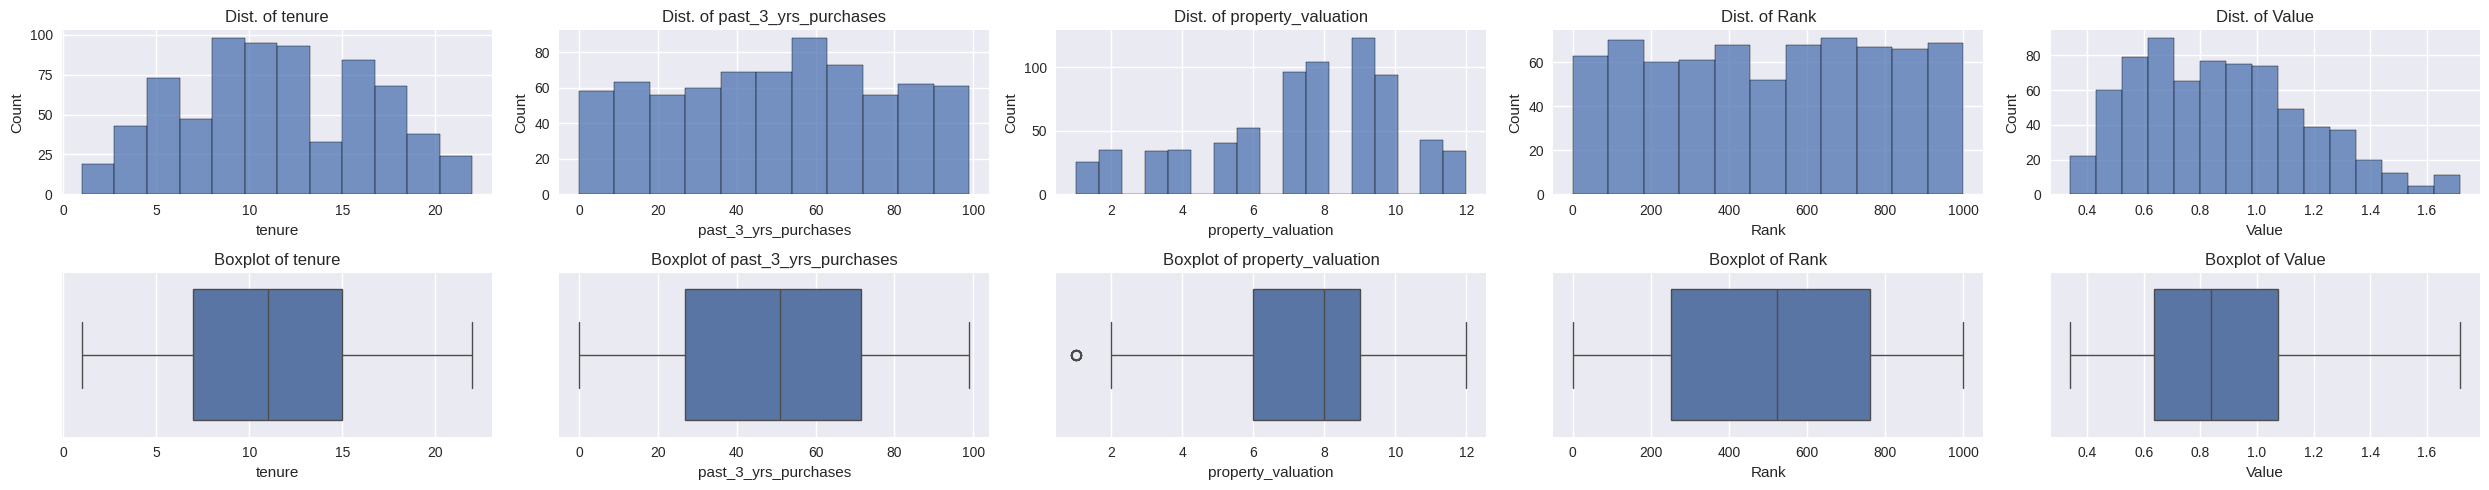

In [38]:
col_list= ['tenure', 'past_3_yrs_purchases', 'property_valuation', 'Rank', 'Value']

plt.figure(figsize= (25, 5))
i= 1
for col in col_list:
    plt.subplot(2, 5, i)
    sns.histplot(data= df_NewCustomerList,
                 x= col,
                 bins= 'auto')
    plt.title(f'Dist. of {col}')

    plt.subplot(2, 5, i+5)
    sns.boxplot(data= df_NewCustomerList,
                x= col)
    plt.title(f'Boxplot of {col}')
    i+=1

plt.tight_layout()
plt.show()

In [39]:
# drop outliers
df_NewCustomerList.drop(index= df_NewCustomerList[df_NewCustomerList['property_valuation'] < 2].index, inplace= True)

In [40]:
df_NewCustomerList.select_dtypes(include= 'number').drop(columns= 'postcode').describe()

,past_3_yrs_purchases,tenure,property_valuation,Rank,Value
count,690.000000,690.000000,690.000000,690.000000,690.000000
mean,49.879710,11.305797,7.617391,510.956522,0.870477
std,27.753294,4.988881,2.601493,289.863926,0.295257
min,0.000000,1.000000,2.000000,1.000000,0.340000
25%,27.000000,7.000000,6.000000,259.000000,0.637500
50%,51.000000,11.000000,8.000000,528.000000,0.830875
75%,72.000000,15.000000,9.000000,760.000000,1.062500
max,99.000000,22.000000,12.000000,1000.000000,1.718750


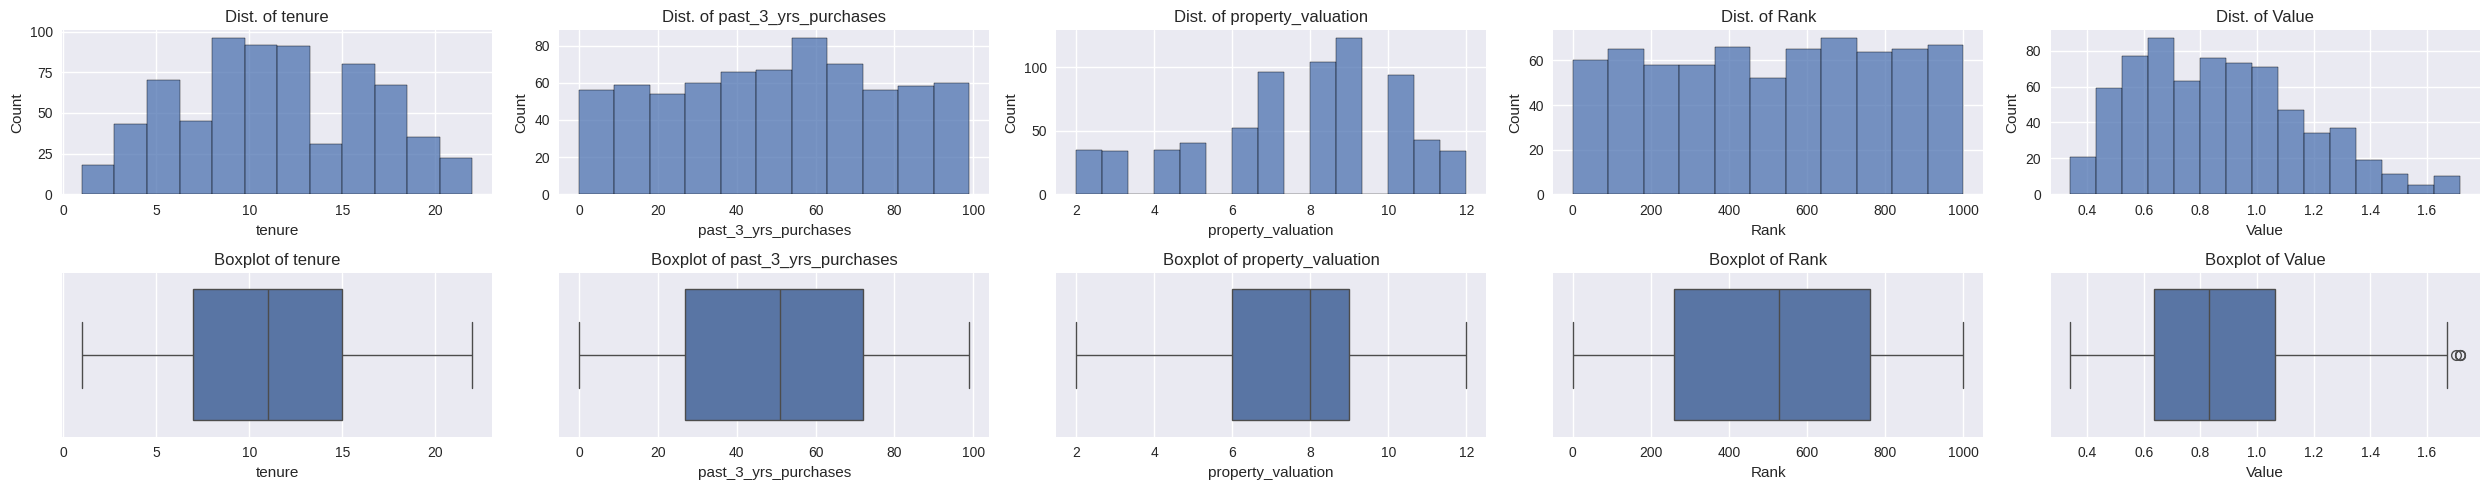

In [41]:
# check again
col_list= ['tenure', 'past_3_yrs_purchases', 'property_valuation', 'Rank', 'Value']

plt.figure(figsize= (25, 5))
i= 1
for col in col_list:
    plt.subplot(2, 5, i)
    sns.histplot(data= df_NewCustomerList,
                 x= col,
                 bins= 'auto')
    plt.title(f'Dist. of {col}')

    plt.subplot(2, 5, i+5)
    sns.boxplot(data= df_NewCustomerList,
                x= col)
    plt.title(f'Boxplot of {col}')
    i+=1

plt.tight_layout()
plt.show()

## Cleaning df_CustomerDemographic

In [42]:
df_CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [43]:
# check data integrity
for col in df_CustomerDemographic.columns:
    if (df_CustomerDemographic[col].dtypes == 'object') & (len(df_CustomerDemographic[col].unique()) <= 15):
        print(f"column name: {col}\n")
        print(f"unique values: {df_CustomerDemographic[col].unique()}\n")

column name: gender

unique values: ['F' 'Male' 'Female' 'U' 'Femal' 'M']

column name: job_industry_category

unique values: ['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']

column name: wealth_segment

unique values: ['Mass Customer' 'Affluent Customer' 'High Net Worth']

column name: deceased_indicator

unique values: ['N' 'Y']

column name: owns_car

unique values: ['Yes' 'No']



In [44]:
# for loop in gender column to replace wrong by correct values
for x in df_CustomerDemographic.index:
    if df_CustomerDemographic.loc[x, 'gender'] == 'F':
        df_CustomerDemographic.loc[x, 'gender'] = 'Female'
    elif df_CustomerDemographic.loc[x, 'gender'] == 'Femal':
        df_CustomerDemographic.loc[x, 'gender'] = 'Female'
    elif df_CustomerDemographic.loc[x, 'gender'] == 'M':
        df_CustomerDemographic.loc[x, 'gender'] = 'Male'
    elif df_CustomerDemographic.loc[x, 'gender'] == 'U':
        df_CustomerDemographic.loc[x, 'gender'] = 'Unknown'

# check
print(df_CustomerDemographic['gender'].unique())

['Female' 'Male' 'Unknown']


In [45]:
# check are there null values after convert
print(f"sum of null after convert= {df_CustomerDemographic['deceased_indicator'].astype(bool).isna().sum()}")

# convert
df_CustomerDemographic['deceased_indicator']= df_CustomerDemographic['deceased_indicator'].astype(bool)

# check
print(f"data type of deceased_indicator column: {df_CustomerDemographic['deceased_indicator'].dtype}")

sum of null after convert= 0
data type of deceased_indicator column: bool


In [46]:
# check are there null values after convert
print(f"sum of null after convert= {df_CustomerDemographic['owns_car'].astype(bool).isna().sum()}")

# convert
df_CustomerDemographic['owns_car']= df_CustomerDemographic['owns_car'].astype(bool)

# check
print(f"data type of owns_car column: {df_CustomerDemographic['owns_car'].dtype}")

sum of null after convert= 0
data type of owns_car column: bool


In [47]:
# check are there duplicated values in customer_id column
print(f"sum of duplicated values in customer_id= {df_CustomerDemographic['customer_id'].duplicated().sum()}")

# check how many null values in job_industry_category
print(f"count of null values in job_industry_category= {df_CustomerDemographic['job_industry_category'].isna().sum()}")

# drop null job_industry_category values
df_CustomerDemographic.drop(index= df_CustomerDemographic[df_CustomerDemographic['job_industry_category'].isna()].index, inplace= True)

# check
print(f"check on sum of null values after drop step in job_industry_category= {df_CustomerDemographic['job_industry_category'].isna().sum()}")

sum of duplicated values in customer_id= 0
count of null values in job_industry_category= 656
check on sum of null values after drop step in job_industry_category= 0


In [48]:
# rename column
df_CustomerDemographic.rename(columns= {'past_3_years_bike_related_purchases': 'past_3_yrs_purchases'}, inplace= True)

# check
print(df_CustomerDemographic.columns)

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_yrs_purchases', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'deceased_indicator', 'default', 'owns_car',
       'tenure'],
      dtype='object')


In [49]:
# convert to datetime
print(f"count of null before= {df_CustomerDemographic['DOB'].isna().sum()}") # count null values befor convert
print(f"count of null if converted= {pd.to_datetime(df_CustomerDemographic['DOB'], format= 'mixed').isna().sum()}") # count null values if converted
df_CustomerDemographic['DOB']= pd.to_datetime(df_CustomerDemographic['DOB'], format= 'mixed') # convert
print(f"data type of DOB column: {df_CustomerDemographic['DOB'].dtype}") # check
df_CustomerDemographic.drop(index= df_CustomerDemographic[df_CustomerDemographic['DOB'].isna()].index, inplace= True) # drop null values
print(f"count of null values after drop= {df_CustomerDemographic['DOB'].isna().sum()}") # check

count of null before= 87
count of null if converted= 87
data type of DOB column: datetime64[ns]
count of null values after drop= 0


In [50]:
print(f"count of null values in last_name column= {df_CustomerDemographic['last_name'].isna().sum()}") # count of null values in last_name column
df_CustomerDemographic.drop(index= df_CustomerDemographic[df_CustomerDemographic['last_name'].isna()].index, inplace= True) # drop null values
print(f"count of null values after drop= {df_CustomerDemographic['last_name'].isna().sum()}") # check

count of null values in last_name column= 96
count of null values after drop= 0


In [51]:
df_CustomerDemographic.drop(columns= 'default', inplace= True) # drop unnessesary default column
print(df_CustomerDemographic.columns) # check

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_yrs_purchases', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure'],
      dtype='object')


In [52]:
# check null
print(f"sum of null values:\n{df_CustomerDemographic.isna().sum()}\n")

# check for duplicated values in 'first_name', 'last_name'
print(f"sum of duplicated in 'first_name', 'last_name'= {df_CustomerDemographic.duplicated(subset= ['first_name', 'last_name']).sum()}")

# drop null in job_title
df_CustomerDemographic.drop(index= df_CustomerDemographic[df_CustomerDemographic['job_title'].isna()].index, inplace= True)

# check
print(f"sum of null values in job_title= {df_CustomerDemographic['job_title'].isna().sum()}")

sum of null values:
customer_id                0
first_name                 0
last_name                  0
gender                     0
past_3_yrs_purchases       0
DOB                        0
job_title                381
job_industry_category      0
wealth_segment             0
deceased_indicator         0
owns_car                   0
tenure                     0
dtype: int64

sum of duplicated in 'first_name', 'last_name'= 0
sum of null values in job_title= 0


In [53]:
# check on index
print(f"{df_CustomerDemographic.info()}\n")

# reset index
df_CustomerDemographic.reset_index(drop= True, inplace= True)

# check again
print(f"index after: {df_CustomerDemographic.index}")

<class 'pandas.core.frame.DataFrame'>
Index: 2780 entries, 0 to 3996
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            2780 non-null   int64         
 1   first_name             2780 non-null   object        
 2   last_name              2780 non-null   object        
 3   gender                 2780 non-null   object        
 4   past_3_yrs_purchases   2780 non-null   int64         
 5   DOB                    2780 non-null   datetime64[ns]
 6   job_title              2780 non-null   object        
 7   job_industry_category  2780 non-null   object        
 8   wealth_segment         2780 non-null   object        
 9   deceased_indicator     2780 non-null   bool          
 10  owns_car               2780 non-null   bool          
 11  tenure                 2780 non-null   float64       
dtypes: bool(2), datetime64[ns](1), float64(1), int64(2), object(6)
memo

In [54]:
# check outliers
print(df_CustomerDemographic.select_dtypes(include= 'number').drop(columns= 'customer_id').describe())

       past_3_yrs_purchases       tenure
count           2780.000000  2780.000000
mean              49.449640    10.703957
std               28.765195     5.674807
min                0.000000     1.000000
25%               25.000000     6.000000
50%               49.000000    11.000000
75%               74.000000    16.000000
max               99.000000    22.000000


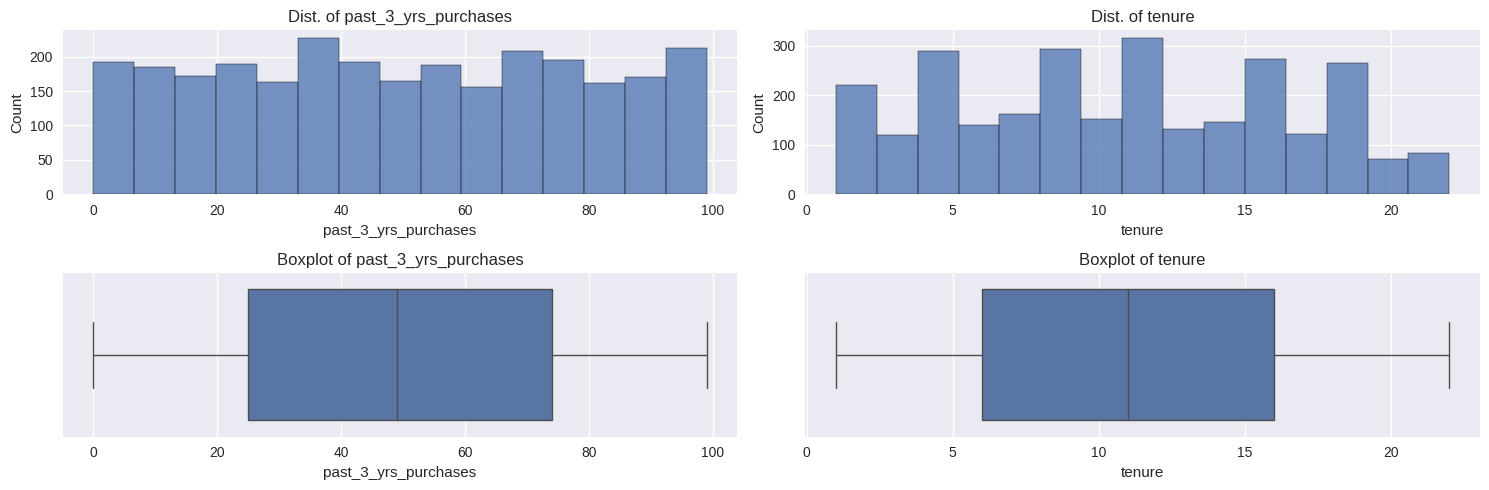

In [55]:
plt.figure(figsize= (15, 5))
column_array= ['past_3_yrs_purchases', 'tenure']
i= 1
for col in column_array:
    plt.subplot(2, 2, i)
    sns.histplot(data= df_CustomerDemographic,
                 x= col,
                 bins= 'auto')
    plt.title(f'Dist. of {col}')

    plt.subplot(2, 2, i+2)
    sns.boxplot(data= df_CustomerDemographic,
                x= col)
    plt.title(f'Boxplot of {col}')
    i+=1

plt.tight_layout()
plt.show()


## Cleaning df_CustomerAddress

In [56]:
df_CustomerAddress.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10


In [57]:
df_CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [58]:
# check data entegrty
for col in df_CustomerAddress.select_dtypes(exclude= 'number').columns:
    if len(df_CustomerAddress[col].unique()) < 15:
        print(f"column name: {col}\n")
        print(f"unique values: {df_CustomerAddress[col].unique()}\n")

column name: state

unique values: ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']

column name: country

unique values: ['Australia']



In [59]:
# replace VIC with Victoria, NSW with New South Wales & QLD with Queensland
for x in df_CustomerAddress.index:
    if df_CustomerAddress.loc[x, 'state'] == 'VIC':
        df_CustomerAddress.loc[x, 'state'] = 'Victoria'
    elif df_CustomerAddress.loc[x, 'state'] == 'NSW':
        df_CustomerAddress.loc[x, 'state'] = 'New South Wales'
    elif df_CustomerAddress.loc[x, 'state'] == 'QLD':
        df_CustomerAddress.loc[x, 'state'] = 'Queensland'

# check
print(df_CustomerAddress['state'].unique())

['New South Wales' 'Queensland' 'Victoria']


In [60]:
# check outliers
print(df_CustomerAddress.select_dtypes(include= 'number').drop(columns= ['customer_id', 'postcode']).describe())

       property_valuation
count         3999.000000
mean             7.514379
std              2.824663
min              1.000000
25%              6.000000
50%              8.000000
75%             10.000000
max             12.000000


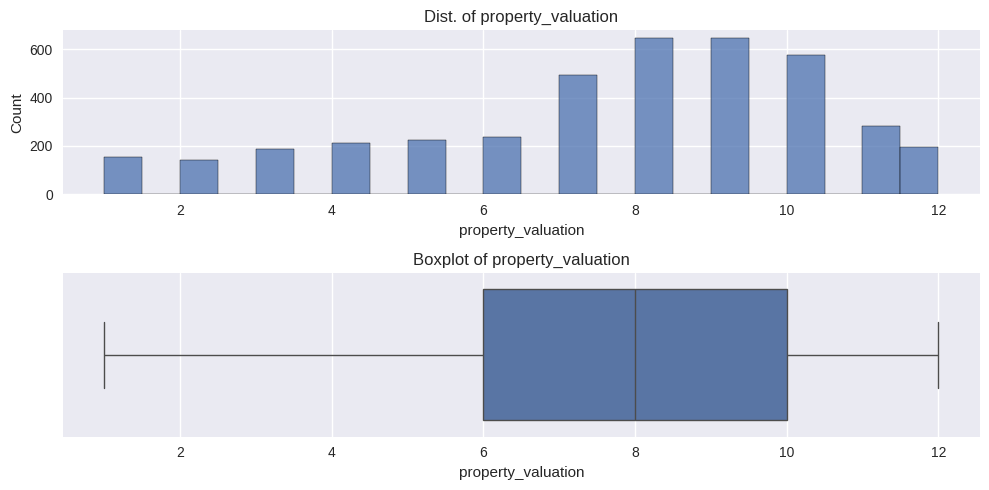

In [61]:
plt.figure(figsize= (10, 5))

plt.subplot(2, 1, 1)
sns.histplot(data= df_CustomerAddress,
             x= 'property_valuation',
             bins= 'auto')
plt.title('Dist. of property_valuation')

plt.subplot(2, 1, 2)
sns.boxplot(data= df_CustomerAddress,
            x= 'property_valuation')
plt.title('Boxplot of property_valuation')

plt.tight_layout()
plt.show()

## Collecte in one dataset

In [62]:
df_transactions.sample()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,f_sold_date
14609,14895,25,2989,2017-09-18,False,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,1970-01-01 00:00:00.000042295


In [63]:
df_CustomerDemographic.sample()

,customer_id,first_name,last_name,gender,past_3_yrs_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
2484,3546,Hally,Pollie,Female,91,1983-09-29,GIS Technical Architect,Manufacturing,Affluent Customer,True,True,9.0


In [64]:
df_CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2780 entries, 0 to 2779
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            2780 non-null   int64         
 1   first_name             2780 non-null   object        
 2   last_name              2780 non-null   object        
 3   gender                 2780 non-null   object        
 4   past_3_yrs_purchases   2780 non-null   int64         
 5   DOB                    2780 non-null   datetime64[ns]
 6   job_title              2780 non-null   object        
 7   job_industry_category  2780 non-null   object        
 8   wealth_segment         2780 non-null   object        
 9   deceased_indicator     2780 non-null   bool          
 10  owns_car               2780 non-null   bool          
 11  tenure                 2780 non-null   float64       
dtypes: bool(2), datetime64[ns](1), float64(1), int64(2), object(6)

In [65]:
df_CustomerDemographic[df_CustomerDemographic['customer_id'].isin(df_transactions['customer_id'])].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2450 entries, 0 to 2454
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            2450 non-null   int64         
 1   first_name             2450 non-null   object        
 2   last_name              2450 non-null   object        
 3   gender                 2450 non-null   object        
 4   past_3_yrs_purchases   2450 non-null   int64         
 5   DOB                    2450 non-null   datetime64[ns]
 6   job_title              2450 non-null   object        
 7   job_industry_category  2450 non-null   object        
 8   wealth_segment         2450 non-null   object        
 9   deceased_indicator     2450 non-null   bool          
 10  owns_car               2450 non-null   bool          
 11  tenure                 2450 non-null   float64       
dtypes: bool(2), datetime64[ns](1), float64(1), int64(2), object(6)
memo

In [66]:
df_CustomerDemographic= df_CustomerDemographic[df_CustomerDemographic['customer_id'].isin(df_transactions['customer_id'])]

In [67]:
df_NewCustomerList.sample()

,first_name,last_name,gender,past_3_yrs_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
819,Callean,Wass,Male,65,1988-12-15,GIS Technical Architect,Financial Services,Affluent Customer,True,True,14,0593 Stoughton Center,3073,Victoria,Australia,8,820,0.584375


In [68]:
df_CustomerAddress.sample()

,customer_id,address,postcode,state,country,property_valuation
3510,3515,3528 Granby Circle,4825,Queensland,Australia,5


In [72]:
df_NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   first_name             690 non-null    object 
 1   last_name              690 non-null    object 
 2   gender                 690 non-null    object 
 3   past_3_yrs_purchases   690 non-null    int64  
 4   DOB                    690 non-null    object 
 5   job_title              690 non-null    object 
 6   job_industry_category  690 non-null    object 
 7   wealth_segment         690 non-null    object 
 8   deceased_indicator     690 non-null    bool   
 9   owns_car               690 non-null    bool   
 10  tenure                 690 non-null    int64  
 11  address                690 non-null    object 
 12  postcode               690 non-null    int64  
 13  state                  690 non-null    object 
 14  country                690 non-null    object 
 15  property_va

In [71]:
df_NewCustomerList[df_NewCustomerList['postcode'].isin(df_CustomerAddress['postcode']) \
& df_NewCustomerList['state'].isin(df_CustomerAddress['state']) & df_NewCustomerList['postcode'].isin(df_CustomerAddress['postcode'])].info()

<class 'pandas.core.frame.DataFrame'>
Index: 649 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   first_name             649 non-null    object 
 1   last_name              649 non-null    object 
 2   gender                 649 non-null    object 
 3   past_3_yrs_purchases   649 non-null    int64  
 4   DOB                    649 non-null    object 
 5   job_title              649 non-null    object 
 6   job_industry_category  649 non-null    object 
 7   wealth_segment         649 non-null    object 
 8   deceased_indicator     649 non-null    bool   
 9   owns_car               649 non-null    bool   
 10  tenure                 649 non-null    int64  
 11  address                649 non-null    object 
 12  postcode               649 non-null    int64  
 13  state                  649 non-null    object 
 14  country                649 non-null    object 
 15  property_va

In [73]:
df_NewCustomerList= df_NewCustomerList[df_NewCustomerList['postcode'].isin(df_CustomerAddress['postcode']) \
& df_NewCustomerList['state'].isin(df_CustomerAddress['state']) & df_NewCustomerList['postcode'].isin(df_CustomerAddress['postcode'])]